<a href="https://www.kaggle.com/code/ayeshairshadcoder/linear-regression-insurance?scriptVersionId=114962280" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[8,5]
plt.rcParams['font.size']=14
plt.rcParams['font.weight']='normal'
plt.style.use('seaborn-whitegrid')

In [3]:
insurance=pd.read_csv("/kaggle/input/insurance/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.shape

(1338, 7)

In [5]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

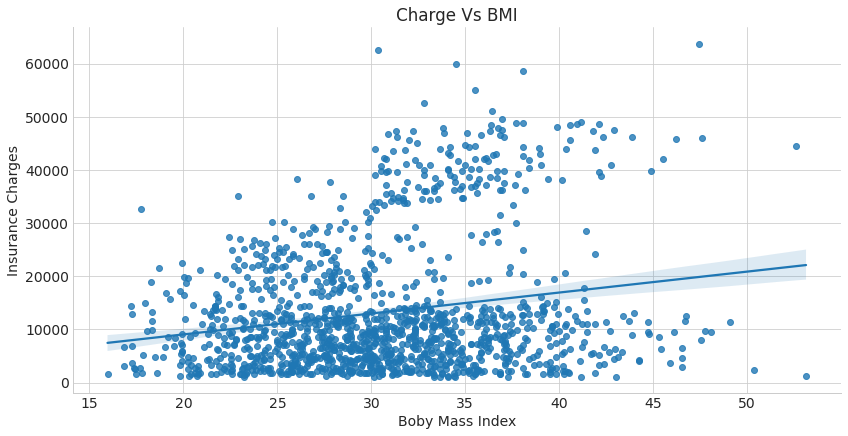

In [6]:
sns.lmplot(x='bmi',y='charges',data=insurance,aspect=2,height=6)
plt.xlabel('Boby Mass Index')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs BMI');

In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


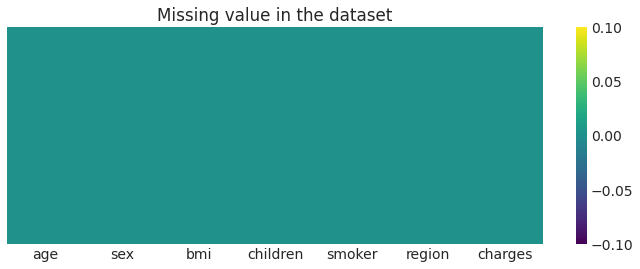

In [9]:
plt.figure(figsize=(12,4))
sns.heatmap(insurance.isnull(),cbar=True,cmap="viridis",yticklabels=False)
plt.title('Missing value in the dataset');

<AxesSubplot:>

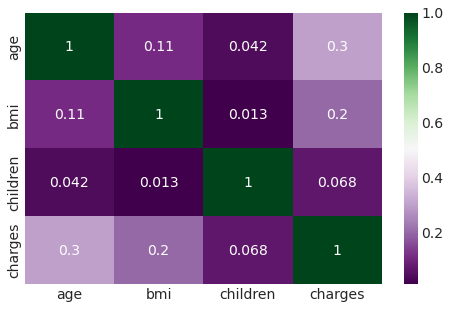

In [10]:
sns.heatmap(insurance.corr(),cmap='PRGn',annot=True)

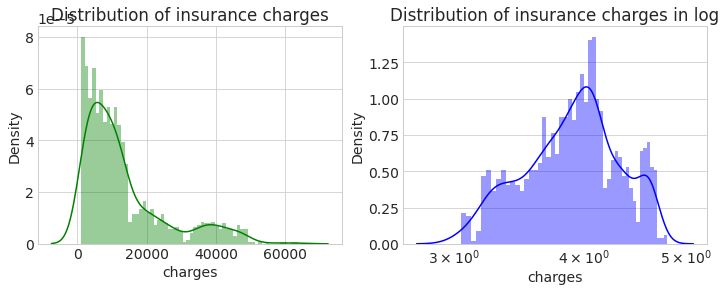

In [11]:
p=plt.figure(figsize=(12,4))
ax=p.add_subplot(121)
sns.distplot(insurance['charges'],bins=60,color='g',ax=ax)
ax.set_title("Distribution of insurance charges")
ax=p.add_subplot(122)
sns.distplot(np.log10(insurance['charges']),bins=50,color='b',ax=ax)
ax.set_title("Distribution of insurance charges in log")
ax.set_xscale("log")


if we look at the left plot the charges varies to almost 60000, the plot is right skewed 

In right plot we will apply natural log then plot the approx tends to normal, for fruther analysis we will apply log on target variable charges 

<Figure size 1008x432 with 0 Axes>

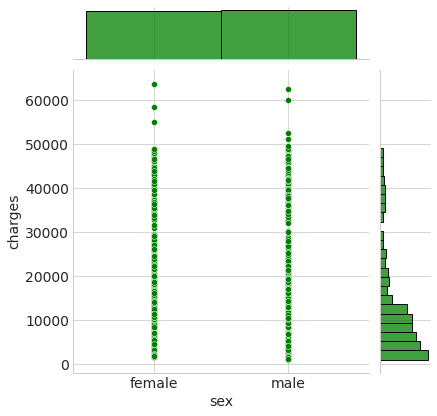

In [12]:
p= plt.figure(figsize=(14,6))
sns.jointplot(x='sex',y='charges',data=insurance,color="Green")

From left plot, insurance charges of male and female is almost same  

From right the insurances charges for smoer is much wide range as compare to non smokers

Text(0.5, 1.0, '\nBox plot of charges vs children')

<Figure size 1008x432 with 0 Axes>

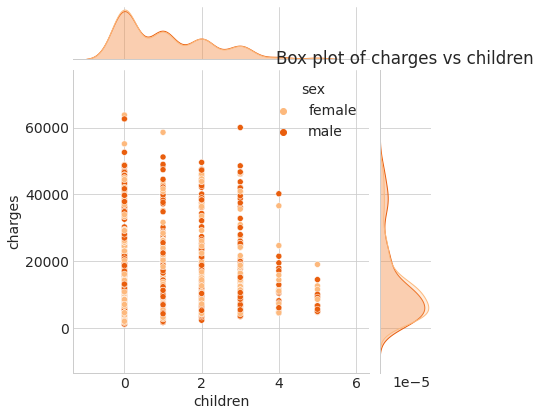

In [13]:
p=plt.figure(figsize=(14,6))
sns.jointplot(x='children',y='charges',hue='sex',data=insurance,palette='Oranges')
plt.title("\nBox plot of charges vs children")

In [14]:
insurance.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


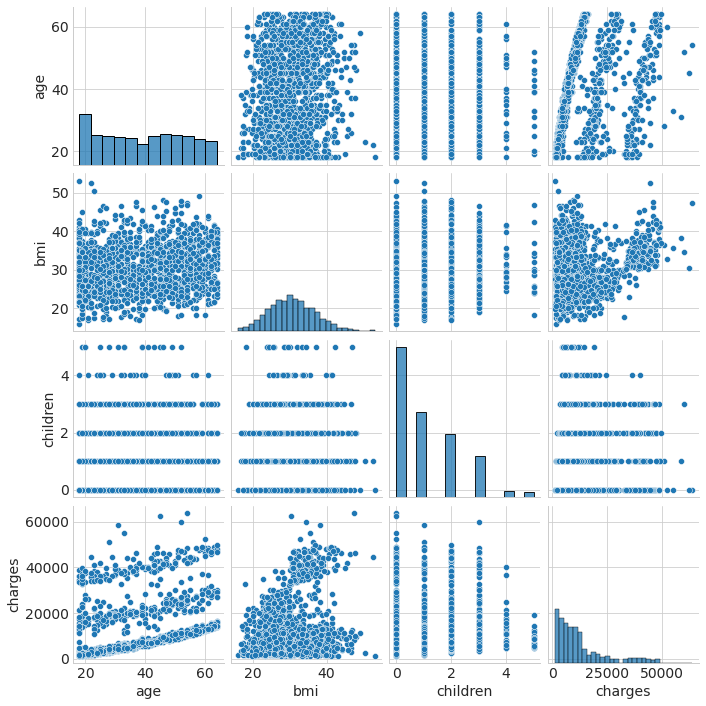

In [15]:
# plt.figure(figsize=(14,6))
# sns.violinplot(x='region',y='charges',hue='sex',data=insurance,palette='Greens',split=True)

# p=plt.figure(figsize=(14,6))
# sns.distplot(x='region',hue='sex',data=insurance,palette='Oranges')
# plt.title("Violin plot charges vs region")
sns.pairplot(insurance)

Text(0.5, 1.0, 'Scatter plot Charges vs Bmi')

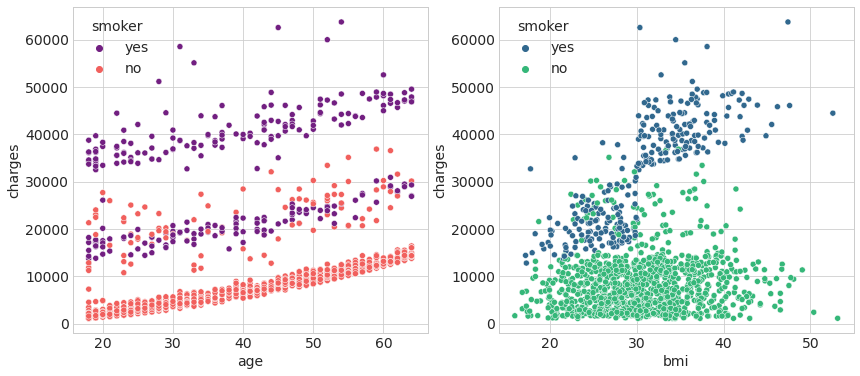

In [16]:
p=plt.figure(figsize=(14,6))
sns.scatterplot(x='age',y='charges',data=insurance,palette="magma",hue="smoker",ax=p.add_subplot(121))
ax.set_title("Scatter plot Charges vs Age")

sns.scatterplot(x="bmi",y='charges',data=insurance,palette="viridis",hue='smoker',ax=p.add_subplot(122))
ax.set_title("Scatter plot Charges vs Bmi")


From left plot the minimum age person is insured is 18 years.
There is slabs in policy most of non smoker take 1st and 2nd slab, for smoker policy start at 2nd and 3rd slab

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. 

# Data Pre-Processing 

In [17]:
insurance.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance.replace({'region':{'southeast':0,'southwest':1,"northeast":2,"northwest":3}},inplace=True)

# Model building

we will be working on linear regression equation   
y= XB+c+e  
y=traget  
X= data  
B=coefficient  
e=error  

using sckit-learn 

In [18]:
X=insurance.drop(columns='charges',axis=1)
Y=insurance['charges']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (936, 6) (402, 6)


In [21]:
regressor=LinearRegression()

In [22]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [23]:
trainingdataprediction=regressor.predict(X_train)

In [24]:
r2=metrics.r2_score(Y_train,trainingdataprediction)
print("R square : ",r2)

R square :  0.7475773015079449


In [25]:
test_predict=regressor.predict(X_test)

In [26]:
r2_test=metrics.r2_score(Y_test,test_predict)
print("R2 value : ",r2_test)

R2 value :  0.7543949515949716


In [27]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3654.33781309]
The insurance cost is USD  3654.3378130895944
